In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from datetime import datetime

In the course of planning previous gatherings during the COVID-19 pandemic, I have had two different discussions with myself and others: "can we gather people safely in the context of this pandemic?" and, "regardless of safety, is it *appropriate* to gather people during the pandemic?". The first is a more quantitative question, while the second is more moral. For the benefit of those who might be invited to gather during COVID-19, I'd like to put forth some thoughts on these topics&mdash;hopefully provoke discussion&mdash;in the order they appear.

It may seem biased to consider the quantitative safety of gathering before the superseding question of whether gathering is approprate *at all*, but I think numbers provide helpful context when determining just how rigid our morals are. Regardless, COVID-19 data in particular&mdash;and how it might be usefully interpreted by regular folks&mdash;is frustratingly opaque and we might learn something beyond the safety of a gathering by its analysis.

To decide whether we can gather people "safely" during this COVID-19 pandemic, we first have to acknowledge that any gathering will incur some additional risk of COVID exposure/spread/infection beyond the normal risks inherent in daily (quarantined) life. So the question is *really*, what is the risk of exposure/spread/infection posed by gathering and do we feel that that risk is low enough to call a gathering "safe"? It's much easier to work out a number estimate of risk than it is to decide if that number is "low", "high", "scary" or "safe", but we can draw from our own instinct as well as decision making criteria in science to help with that determination.

The main point of quarantine behavior is to avoid contact with COVID (+) people&mdash;that's the only way to assure there is zero chance of having COVID transmitted to you, or you transmitting it to someone else&mdash;so we ought to try to calculate the probability that we are successful or unsuccessful in avoiding COVID (+) people despite gathering together. To begin, let's get some data. As an example, I'll work with data provided for Los Angeles county on their COVID19 Surveillance website (http://dashboard.publichealth.lacounty.gov/covid19_surveillance_dashboard/)

In [2]:
#file downloaded from source above
file = '20201207_LA_County_Covid19_cases_deaths_date_table.csv'

#open the data here
df = pd.read_csv(file)

#get rid of possibly unreliable most recent information
df = df.drop(0, 'index')

In [3]:
def get_date (string):
    """
    This takes a text string date and turns it into a more useful datetime format
    """
    try:
        time = datetime.strptime(string, '%m/%d/%Y')
    except:
        time = datetime.strptime(string, '%Y-%m-%d')
    return time

In [4]:
#convert the dates in the original data to something easier to use
df['date'] = df['date_use'].apply(get_date)

#get rid of unnecessary columns and make it look nice
df = df.drop(["Unnamed: 0", "date_use"], axis=1)
cols = list(df.columns)
df = df[[cols[-1]] + cols[:-1]]

Below is a plot of the most recent case and death data from LA county. I've excluded the most recent date's entry (possibly today) since it may be incomplete. We can see a distinct periodicity to the results. Approximately every 7th day (10/18, 10/25, 11/2, 11/8, 11/15, 11/22) there is a drop in confirmed COVID cases for reasons I don't understand and won't try to explain. During the intervening days, case numbers are more or less constant. This trend is broken during Thanksgiving week (11/23-11/29), when we can assume people were either gathering&mdash;"safely" or otherwise&mdash;or having a quarantined Thanksgiving, **not** getting tested. The huge spike in COVID cases observed in the following week (~9k cases on 11/30 and 12/1) could be interpreted as the shifting of the cases we might have observed in Thanksgiving week onto those days, not *necessarily* a massive travel and unsafe gathering-induced case wave.

Text(0, 0.5, 'daily new cases')

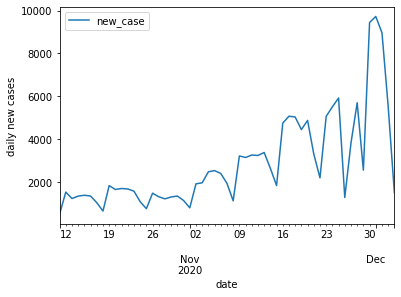

In [5]:
df.head(55).plot(x='date', y='new_case')
plt.ylabel('daily new cases')

Here's a look at the raw numbers as well as the other values being tracked over the last 14 days. The media and most COVID surveillance websites that I've seen overemphasize the total number of COVID-19 cases reported over *all time* ("total_cases" in the table below), which looks big and scary, but is not actually an informative piece of information. The value we care about when planning a gathering is "daily new cases" ("new_case" in the table below), but only new cases over the last couple weeks. The infectious period for someone with COVID 19 is ~14 days, meaning only people who tested positive within the last 14 days could be *active* spreaders of disease.

In [6]:
tot = df.head(14)['new_case'].sum()
print('Total new cases (considered currently active cases) over the last 14 days: ', tot)
df.head(14)

Total new cases (considered currently active cases) over the last 14 days:  70482


,date,total_cases,new_case,avg_cases,total_deaths,new_deaths,avg_deaths
1,2020-12-04,427545,1494,6201.0,7489,10,25.0
2,2020-12-03,426051,5529,6532.0,7479,30,26.0
3,2020-12-02,420522,8964,5924.0,7449,25,25.0
4,2020-12-01,411558,9727,5490.0,7424,35,25.0
5,2020-11-30,401831,9443,4887.0,7389,25,24.0
6,2020-11-29,392388,2550,4261.0,7364,23,26.0
7,2020-11-28,389838,5699,4210.0,7341,26,27.0
8,2020-11-27,384139,3815,3868.0,7315,20,27.0
9,2020-11-26,380324,1273,4019.0,7295,22,27.0
10,2020-11-25,379051,5920,4472.0,7273,24,29.0


Now that we have the raw data for the county, we can start estimating the risks of gathering people together. The way we will do this is:

-**First**, calculate the probability that a person in a region (in this case LA county) is an *active* COVID case using the 14 day new case total we found above. We assume that every person in the county is just like every other person and thus has the same probability of being COVID (+). Whether or not we would consider ourselves or other groups a privileged group (based on socioeconomic status, job type etc.) with lower than average risk of being COVID (+), the determination of increased/decreased risk would be arbitrary, overcomplicated, and introduce significant risk of *MAN'S HUBRIS* blinding us to true risks we all face as residents of our region. Thus we assume that "I am he as you are he as you are me and we are all"...the same.

The data reported around the country for COVID is almost always *confirmed cases*, which means the number of positive tests reported in the region. But the number of *actual* cases in a region will almost certainly be greater than the number of *confirmed* cases due to the possibility of asymptomatic (probably *un*tested) infection, poor test availability, or social factors that would keep people&mdash;even sick people&mdash;from getting tested. So we'll make a guess at how many times more actual cases there are than confirmed cases and multiply our calculated infection probability by that number. This is usually called an *ascertainment bias*.

-**Second**, we treat the gathering of many people like a collection of flipped coins, in which each person's COVID-19 status is the result of a very biased coin flip (not 50-50) with heads representing COVID (+) and tails COVID (-). The bias of the coin&mdash;the probability of a head&mdash;is exactly the probability of active infection we calculated in the first step. In the language of probability and statistics, this is called drawing from a binomial distribution or modeling a system using a binomial distribution.

The calculation we'll make using this model is:

    What is the probability that NOBODY at a gathering is an active COVID case?
    
The opposite side of this calculation is, "what is the probability that AT LEAST one person at a gathering is an active COVID case?"

Up to this point, the steps taken are not the first analysis of this type to be publicly available. There is a great tool available from Georgia Tech (Georgia Institute of Technology) that implements this exact process to determine gathering risk in every county in America (https://covid19risk.biosci.gatech.edu).

-**Third**, we look to medical statistics literature (which is really just regular statistics literature) about disease screening tests&mdash;the ones you can hopefully get in your region&mdash;and calculate the probability that someone is an active COVID case even *after* they have received a negative test result. It is important to emphasize that all tests have the possibility to return false positives or negatives, and a negative test is *not* a confirmation that someone is not infected. This step will tell us just how much a negative test tells us about our COVID status.

Then we will rerun the binomial model to answer the new question:

    What is the probability that NOBODY at a gathering is an active COVID case after everyone has tested negative for COVID?

## First, probabillity that a person is an active case

In [7]:
#total number of active cases is determined above

#roughly LA county population
la_pop= 10*10**6 #that's 10 million

#probability of active case, also known as pre test probability
pre_prob = tot/la_pop

#ascertainment biases, multipliers of confirmed cases to estimate actual pre-test probability in total pop
    #GA Tech estimates from blood test data a bias of 10, meaning there are 10x more actual cases than positive tests
a_biases = [1, 5, 10, 20]

In [8]:
print('1) Probability that anyone in LA county is an active COVID case: ', pre_prob * 100, '% \n')
print('2) Probability that anyone is an active COVID case assuming 10x more cases than positive tests: ', pre_prob * 10 * 100, '%')

1) Probability that anyone in LA county is an active COVID case:  0.70482 % 

2) Probability that anyone is an active COVID case assuming 10x more cases than positive tests:  7.0482000000000005 %


We've divided the number of active cases in LA county by the population of LA county to get the probability that any one person in the county is an active covid case. That number is "1)" above and it's pretty small! With the recent rise in daily case rate, this is probably the highest probability of being a COVID-19 case we have seen yet. Even when cases are on a scary rising trend, still less than 1% of the population are testing COVID (+).

That's not the whole story. The probability in "1)" is actually something less impactful, nothing more than "the probability of being someone who has received a positive COVID test" or something like that. That doesn't say much. So now let's take Georgia Tech's assumption that there are 10x more *actual* cases than *confirmed* cases, see "2)". That gives us a probability of being actively COVID (+) nearer to 10%. That's big! Percentages are sometimes hard to interpret; this would mean that in an ideal sample of LA county people, 7 of 100 would be COVID (+). That might make you feel a bit suspicious of any people you interact with day to day.

## Second, probability that NOBODY in a group is COVID (+)

The story told by an event or system can guide you to the best choice of probability distribution to use to model the event/system. In the case of a COVID gathering, we have a bunch of independent people who have two possible states: COVID (+) or COVID (-), we have an estimate of the probability of each state in each individual and we want to model the probability that various numbers of people in the group are COVID (+). That sounds like a group of flipped coins to me, and we want to model the probability that various numbers of coins turn up heads. That's the story of the binomial distribution. The distribution is pictured below, we'll consider a "success" in this case to be COVID (+) status.

![binom equation](binomial-distribution-formula.png)

In the limiting case we're considering, that of 0 "successes" or 0 COVID (+) people in a group of size *n*, the equation reduces to:

![binom equation](binomial-0_eq.png)

In [9]:
#define a function to calculate the probability of 0 COVID cases in a group
def prob_nobody_has (rate, group_size):
    
    return (1-(rate))**group_size

In [16]:
#calculate probabilities for a range of group sizes and ascertainment biases

full = []
for s in range(1,31):
    data = {bias: prob_nobody_has(pre_prob*bias, s) for bias in a_biases}
    full.append(pd.DataFrame(data, np.array([s])))
    
df = pd.concat(full)
df.index.name = 'group_size'
df.rename_axis("ascert_bias", axis="columns", inplace=True)

Here's a plot of group size and the probability of having ZERO COVID (+) group members, using the probabilities we just esimated in section 1 and the equation pictured above. Each curve is calculated using a different ascertainment bias, the <span style="color:blue">blue</span> one is a bias of 1 or no bias at all, just using the raw probability of being a *confirmed* case by testing. The <span style="color:green">green</span> curve represents a bias of 10x, the value assumed by GA Tech. The <span style="color:purple">purple</span> line is set at 95% probability of the group being fully COVID free.

We can see that with increasing group size, the probability of being fully COVID free drops precipitously. As we assume that *actual* cases exceed *confirmed* cases by larger ascertainment biases, even a single person is less than 95% certain to be COVID (-) by themselves. 95% certainty is an arbitrary threshold to meet to say a group is "safely" COVID free&mdash;it's frequently used in science, but usually for garbage reasons or no reason at all.

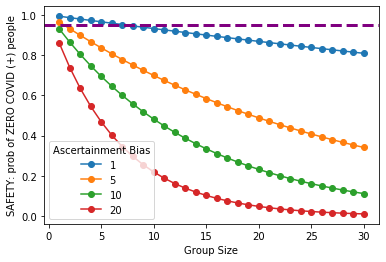

In [34]:
#draw a plot
[plt.plot(df.index, df[b], marker='o') for b in a_biases]
plt.legend(title='Ascertainment Bias', labels=a_biases)
plt.xlabel('Group Size')
plt.ylabel('SAFETY: prob of ZERO COVID (+) people')

plt.axhline(0.95, linestyle='--', color='purple', linewidth=3)

Let's pin a specific number on our gathering and its probability of safety.

Our gathering has an invite list of 13, which with an acertainment bias of 10x, has only a

In [45]:
df.loc[13,10]*100

38.66797732244768

percent chance of being safely COVID free.

That probability of safety is really low and definitely outside my personal comfort zone. Only a bias of 1, or the assumption that there are *no* additional cases beyond those confirmed by testing (not very realistic), has a remotely comfortable probability of leaving our gathering COVID free.

If this were the end of the story, the gathering would be too unsafe for comfort and it would be terminated, before considering any moral quandary.

## Third, what if everyone has tested COVID (-)?

Now onto the most terribly explained topic in all of medical school education: sensitivity, specificity, positive/negative predictive value and the larger world of diagnostic statistics.

show the chart and say a small piece about what this means. Then talk about odds ratios and likelihood ratios and how theres no reasonable derivation of these that you've ever seen and then run them through and explain what you get on the other side, as if by magic. But also explain that for things that are fairly rare, a negative test doesn't make you very much less likely to have a thing than you were before the test, since that prob was really low at the start.